# Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('DataSet.xlsx')

In [3]:
df

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,GDP,Unemployment,AKP,Unnamed: 8
0,2002,1.509,0.2970,0.3080,0.480,238000000000,0.103,0.34280,NaN
1,2004,1.425,0.0930,0.1380,0.199,404000000000,0.108,0.41670,NaN
2,2007,1.305,0.0839,0.0594,0.169,677000000000,0.103,0.46580,NaN
3,2009,1.551,0.0653,0.0593,0.088,645000000000,0.140,0.38390,NaN
4,2010,1.550,0.0640,0.0887,0.079,748000000000,0.119,0.57880,NaN
5,2011,1.674,0.1045,0.1333,0.100,730000000000,0.098,0.49830,NaN
6,2014,2.190,0.0817,0.0636,0.098,934000000000,0.099,0.42870,NaN
7,2015,2.720,0.0881,0.0571,0.102,855000000000,0.103,0.45185,NaN
8,2017,3.653,0.1192,0.1547,0.128,851000000000,0.109,0.51410,NaN
9,2018,4.820,0.2030,0.3364,0.190,789000000000,0.110,0.47600,NaN


In [4]:
df = df.drop('Unnamed: 8', axis = 1)

In [5]:
df

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,GDP,Unemployment,AKP
0,2002,1.509,0.2970,0.3080,0.480,238000000000,0.103,0.34280
1,2004,1.425,0.0930,0.1380,0.199,404000000000,0.108,0.41670
2,2007,1.305,0.0839,0.0594,0.169,677000000000,0.103,0.46580
3,2009,1.551,0.0653,0.0593,0.088,645000000000,0.140,0.38390
4,2010,1.550,0.0640,0.0887,0.079,748000000000,0.119,0.57880
5,2011,1.674,0.1045,0.1333,0.100,730000000000,0.098,0.49830
6,2014,2.190,0.0817,0.0636,0.098,934000000000,0.099,0.42870
7,2015,2.720,0.0881,0.0571,0.102,855000000000,0.103,0.45185
8,2017,3.653,0.1192,0.1547,0.128,851000000000,0.109,0.51410
9,2018,4.820,0.2030,0.3364,0.190,789000000000,0.110,0.47600


# Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               11 non-null     int64  
 1   Dollar             11 non-null     float64
 2   Inflation (TÜFE)   11 non-null     float64
 3   Inflation(Toptan)  11 non-null     float64
 4   Interest Rate      11 non-null     float64
 5   GDP                11 non-null     int64  
 6   Unemployment       11 non-null     float64
 7   AKP                11 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 832.0 bytes


In [7]:
df.describe(include = 'all')

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,GDP,Unemployment,AKP
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000
mean,2011.454545,2.552182,0.119827,0.133827,0.161182,6.927273e+11,0.111455,0.454568
std,5.680909,1.515612,0.070076,0.099700,0.113518,2.047291e+11,0.013967,0.064187
min,2002.000000,1.305000,0.064000,0.057100,0.079000,2.380000e+11,0.098000,0.342800
25%,2008.000000,1.529500,0.082800,0.061500,0.099000,6.610000e+11,0.103000,0.422700
50%,2011.000000,1.674000,0.093000,0.088700,0.128000,7.480000e+11,0.108000,0.451850
75%,2016.000000,3.186500,0.118800,0.146350,0.179500,8.200000e+11,0.114500,0.487150
max,2019.000000,5.677000,0.297000,0.336400,0.480000,9.340000e+11,0.140000,0.578800


# Determining the Inputs and Targets

In [8]:
targets = df['AKP']
inputs = df.drop(['AKP', 'Year', 'Dollar'] ,axis=1)

# Scaling and Fitting the Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(inputs)

StandardScaler()

In [12]:
inputs_scaled = scaler.transform(inputs)

# Splitting the Data as Train and Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [15]:
X_train

array([[-0.02136173, -0.63356718, -0.1957016 ,  0.2882801 ,  1.6930004 ],
       [-0.53771687, -0.78294559,  0.07223321, -0.0805694 , -0.63487515],
       [-0.40151884,  0.04389545,  0.34940716, -1.47912372, -0.25941135],
       [-0.00938828,  0.21957287, -0.30657118,  0.81081688, -0.18431859],
       [-0.8355565 , -0.47472113, -0.75928863,  0.28315719,  0.566609  ],
       [-0.47485624, -0.80714068, -0.5467886 ,  0.83130852, -0.63487515],
       [-0.81609964, -0.78399755, -0.67613645, -0.2445025 ,  2.14355696],
       [-0.57064386, -0.73876324, -0.58374513,  1.23601838, -0.93524619]])

In [16]:
y_train

10    0.44330
2     0.46580
1     0.41670
8     0.51410
4     0.57880
7     0.45185
3     0.38390
6     0.42870
Name: AKP, dtype: float64

In [17]:
X_test

array([[-0.22940046, -0.0055467 , -0.56526687,  0.19094481, -1.01033895],
       [ 2.65171154,  1.83222848,  2.94560313, -2.32952672, -0.63487515],
       [ 1.24483087,  2.13098529,  0.26625497,  0.49319648, -0.10922583]])

In [18]:
y_test

5    0.4983
0    0.3428
9    0.4760
Name: AKP, dtype: float64

# Creating the Model

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_hat = reg.predict(X_train)

In [22]:
y_hat

array([0.41715088, 0.43434897, 0.43743945, 0.52374045, 0.49542894,
       0.44278485, 0.44394014, 0.48831633])

# Plotting the Prediction

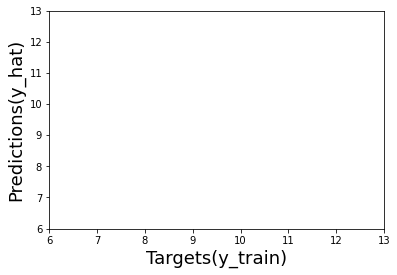

In [23]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)', size = 18)
plt.ylabel('Predictions(y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

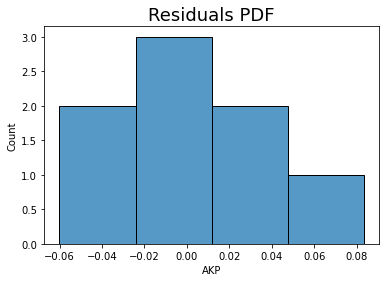

In [24]:
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)

# R-squared

In [25]:
reg.score(X_train, y_train)

0.3712400805189624

# Weights and Bias

In [26]:
reg.intercept_

0.4610706041470493

In [27]:
reg.coef_

array([-0.145672  ,  0.12215368,  0.07712952,  0.07489301,  0.01409642])

In [28]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary ['Weights'] = reg.coef_
reg_summary

#positive weight means there is a positive relationship between the feature in question and the target.
#negative weight means there is a negative relationship between the two.


,Features,Weights
0,Inflation (TÜFE),-0.145672
1,Inflation(Toptan),0.122154
2,Interest Rate,0.077130
3,GDP,0.074893
4,Unemployment,0.014096


# Testing

In [29]:
y_hat_test = reg.predict(X_test)

In [30]:
y_hat_test

array([0.45026979, 0.34238216, 0.5959747 ])

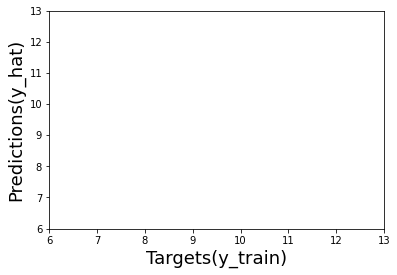

In [31]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size = 18)
plt.ylabel('Predictions(y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Measuring the Model's Performance

In [32]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Predictions'])
df_pf

,Predictions
0,0.450270
1,0.342382
2,0.595975


In [33]:
df_pf['Target'] = y_test
df_pf

,Predictions,Target
0,0.450270,0.3428
1,0.342382,NaN
2,0.595975,NaN


In [34]:
y_test = y_test.reset_index(drop = True)

In [35]:
df_pf['Target'] = y_test

In [36]:
df_pf['Residuals'] = df_pf ['Target'] - df_pf ['Predictions']

In [37]:
df_pf ['Differences %'] = np.absolute(df_pf ['Residuals'] / df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Differences %
0,0.450270,0.4983,0.048030,9.638814
1,0.342382,0.3428,0.000418,0.121891
2,0.595975,0.4760,-0.119975,25.204768


In [38]:
df_pf.describe(include = 'all')

,Predictions,Target,Residuals,Differences %
count,3.000000,3.000000,3.000000,3.000000
mean,0.462876,0.439033,-0.023842,11.655158
std,0.127265,0.084083,0.086590,12.662421
min,0.342382,0.342800,-0.119975,0.121891
25%,0.396326,0.409400,-0.059778,4.880352
50%,0.450270,0.476000,0.000418,9.638814
75%,0.523122,0.487150,0.024224,17.421791
max,0.595975,0.498300,0.048030,25.204768


In [39]:
pd.set_option('display.float_format', lambda x: '%2f' % x)
df_pf.sort_values(by = ['Differences %'])

,Predictions,Target,Residuals,Differences %
1,0.342382,0.342800,0.000418,0.121891
0,0.450270,0.498300,0.048030,9.638814
2,0.595975,0.476000,-0.119975,25.204768


In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

NameError: name 'test_predictions' is not defined

In [ ]:
MAE

In [ ]:
MSE

In [ ]:
RMSE

In [ ]:
df['AKP'].mean()

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

In [ ]:
final_model.score(X_test, y_test)

In [ ]:
y_hat = final_model.predict(X)

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=6,figsize=(16,6))

axes[1].plot(df['Inflation (TÜFE)'],df['AKP'],'o')
axes[1].plot(df['Inflation (TÜFE)'],y_hat,'o',color='red')
axes[1].set_title("Inflation (TÜFE)")
axes[1].set_ylabel("AKP")

axes[2].plot(df['Inflation(Toptan)'],df['AKP'],'o')
axes[2].plot(df['Inflation(Toptan)'],y_hat,'o',color='red')
axes[2].set_title("Inflation(Toptan)");
axes[2].set_ylabel("AKP")

axes[3].plot(df['Interest Rate'],df['AKP'],'o')
axes[3].plot(df['Interest Rate'],y_hat,'o',color='red')
axes[3].set_title("Interest Rate");
axes[3].set_ylabel("AKP")

axes[4].plot(df['GDP'],df['AKP'],'o')
axes[4].plot(df['GDP'],y_hat,'o',color='red')
axes[4].set_title("GDP");
axes[4].set_ylabel("AKP")

axes[5].plot(df['Unemployment'],df['AKP'],'o')
axes[5].plot(df['Unemployment'],y_hat,'o',color='red')
axes[5].set_title("Unemployment");
axes[5].set_ylabel("AKP")
plt.tight_layout();

In [ ]:
y_hat = pd.DataFrame(y_hat)

In [ ]:
y_hat.columns.values

In [ ]:
y_hat